# Recurrent neural network (RNN)

#Overview

In this lab, you will learn how to use Pytorch to build a recurrent neural network (RNN) for stock price prediction. You will learn some of the technical indicators that are commonly used in stock price prediction. You will also learn how to evaluate the performance of the RNN.

# Introduction

Stock price prediction is a challenging task. There are many factors that can affect the stock price. Some of the factors are related to the company itself, such as the company’s financial status, the company’s management, and the company’s products. Some of the factors are related to the market, such as the market sentiment, the market trend, and the market volatility. They made the stock price fluctuate a lot. It is very difficult to predict the stock price accurately. However, recent studies have shown that deep learning may feasible to predict the stock price. It’s also a good demonstration of how to use deep learning to tackle time series data problems in real life.

## Recurrent neural network (RNN)

Recurrent neural network (RNN) is a family of neural network that is suitable for processing sequential data. RNN is widely used in natural language processing (NLP) and speech recognition. In this lab, you will learn how to use RNN to predict stock price. Since stock price is a time series data, RNN is a good choice for this task. You will also learn how to evaluate the performance of the RNN.

There are three types of RNN: RNN, LSTM, and GRU. In this lab, we will use GRU to predict the stock price. GRU is a simplified version of LSTM. It is easier to train and faster to compute than LSTM.

##Deep learning framework

Tensorflow and Pytorch are two most popular deep learning frameworks. They are both open source and powerful. Recently, Pytorch is getting more and more popular due to community support, especially the Hugging Face community. There are nearly half of million of pre-trained models on Hugging Face that you can use directly.

In this lab, we will use Pytorch to build the RNN model for stock price prediction. Pytorch is a deep learning framework developed by Facebook. It is very popular in the research community. It is also very easy to use. You can learn more about Pytorch from here.

#Objectives

In this lab, you will learn how to:

* Fetch financial data from Finnhub API and Yahoo Finance
* Build a recurrent neural network (RNN) for stock price prediction
* Understand RSI, MACD, Bollinger Bands technical indicators and some more technical indicators
* Predict stock price change percentage with RNN
* Evaluate the performance of the model
* Understand the limitations of the model

# **Getting Started**

## Fetch and explore the financial data

There are many ways to fetch financial data. We will first take a look to Finnhub API. Finnhub is a free API that you can use to fetch financial data. You can register a free account and get an API key from [here](https://finnhub.io/). After you get the API key, you could use their Python SDK to fetch the financial data.

### Market news

Market news could affect the stock price a lot. Let’s first take a look at how to fetch the market news from Finnhub API. You could use the following command to fetch the market news:

**Install the Finnhub package with pip command:**

In [ ]:
!pip install finnhub-python

In [ ]:
import finnhub
finnhub_client = finnhub.Client(api_key="YOUR-API-KEY")
print(finnhub_client.general_news('general', min_id=0))

**Searchfor stock symbols**

To search for stock symbols, at least you will need to know the company name. You could use the following command to search for stock symbols:

In [ ]:
print(finnhub_client.symbol_lookup('apple'))

**Company news**

Previously, we have learned how to fetch the market news. Now, let’s take a look at how to fetch the news of a specific company. You could use the following command to fetch the company

In [ ]:
print(finnhub_client.company_news('AAPL', _from="2023-12-01", to="2024-01-27"))

**Real-time stock price**

For getting the real-time quote, you could use the following command to fetch the real-time stock price:

In [ ]:
print(finnhub_client.quote('AAPL'))

**Historical stock price**

For fetching historical stock price, we will use yfinance to fetch the stock price data. It is a very convenient package to fetch stock price data from Yahoo Finance. After you install the package, you could import it with the following command:

In [ ]:
import yfinance as yf

aapl = yf.Ticker('AAPL').history(interval='1d', start='2020-01-01', end='2020-12-31')
aapl

**Explore the stock price data**

Let’s take a look at the stock price data. You could use the following command to print the stock price data:

In [ ]:
aapl.info()

We may also interested in the statistical information of the stock price data. You could use the following command to print the statistical information of the stock price data:

In [ ]:
aapl.describe()

## Visualize the stock price

After fetching the stock price data, we could visualize the stock price data with matplotlib. You could use the following command to plot the historical Open and Close price of each day:

In [ ]:
import matplotlib.pyplot as plt

plt.plot(aapl.index, aapl['Open'], label="Open")
plt.plot(aapl.index, aapl['Close'], label="Close")
plt.legend()
plt.show()

We could also plot the historical high and low price of each day:

In [ ]:
plt.plot(aapl.index, aapl['High'], label="High")
plt.plot(aapl.index, aapl['Low'], label="Low")
plt.legend()
plt.show()

##Technical indicators
Technical indicators are widely used in stock price prediction. There are many technical indicators that you could use. In this lab, we will use the following technical indicators:

* Moving Average Convergence Divergence (MACD)
* Bollinger Bands (BB)
* Average Directional Index (ADX)
* Average true range (ATR)
* T3 Moving Average (T3)
* Money Flow Index (MFI)
* On-balance volume (OBV)
* LogReturn indicator
* Rolling Z Score indicator
* Qstick indicator

**Moving Average Convergence Divergence (MACD)**

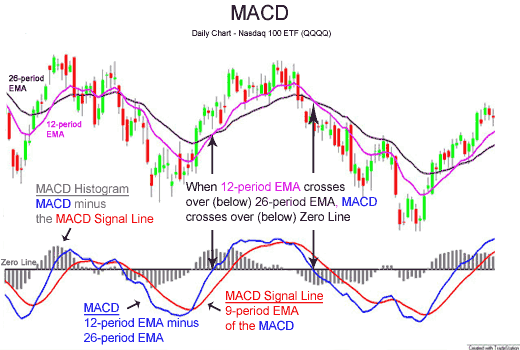

MACD is a trend-following momentum indicator that shows the relationship between two moving averages of a security’s price. The MACD is calculated by subtracting the 26-period Exponential Moving Average (EMA) from the 12-period EMA. The result of that calculation is the MACD line. A nine-day EMA of the MACD called the “signal line,” is then plotted on top of the MACD line, which can function as a trigger for buy and sell signals. Traders may buy the security when the MACD crosses above its signal line and sell - or short - the security when the MACD crosses below the signal line. Moving Average Convergence Divergence (MACD) indicators can be interpreted in several ways, but the more common methods are crossovers, divergences, and rapid rises/falls.

**Bollinger Bands (BB)**

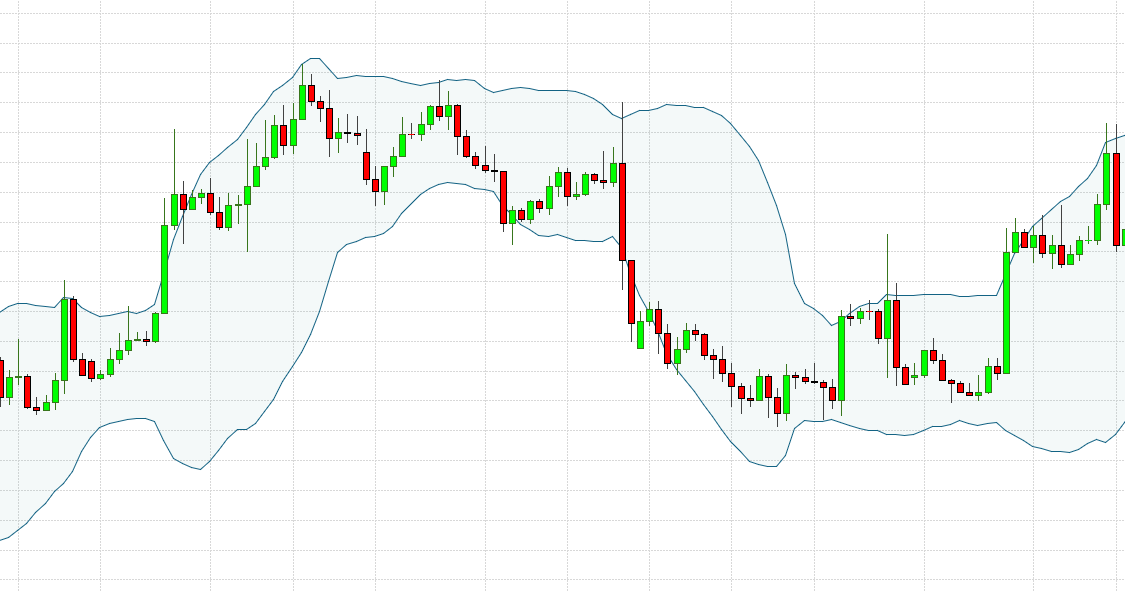

Bollinger Bands are a type of statistical chart characterizing the prices and volatility over time of a financial instrument or commodity, using a formulaic method propounded by John Bollinger in the 1980s. Financial traders employ these charts as a methodical tool to inform trading decisions, control automated trading systems, or as a component of technical analysis. Bollinger Bands display a graphical band (the envelope maximum and minimum of moving averages, similar to Keltner or Donchian channels) and volatility (expressed by the width of the envelope) in one two-dimensional chart.

**Average Directional Index (ADX)**
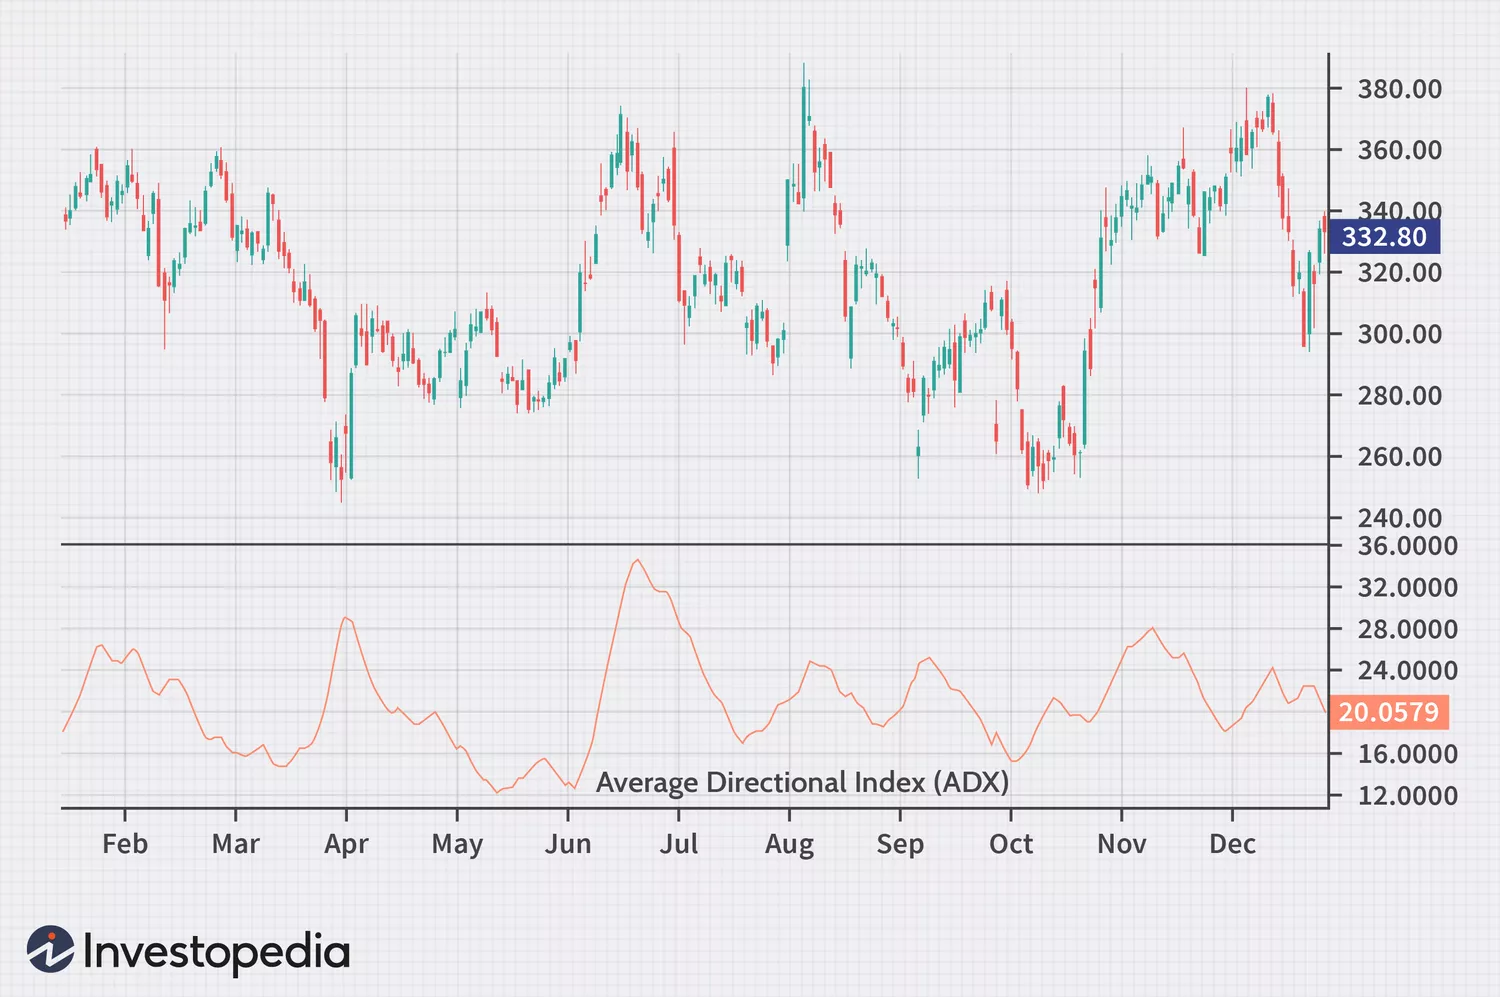

The average directional index (ADX) is a technical analysis indicator used by some traders to determine the strength of a trend. The trend can be either up or down, and this is shown by two accompanying indicators, the Negative Directional Indicator (-DI) and the Positive Directional Indicator (+DI). The ADX is used to determine the potential of the market regarding its trend. It can also be used to determine when one should enter or exit a trade, based on whether the trend is rising or falling.

**Average true range (ATR)**
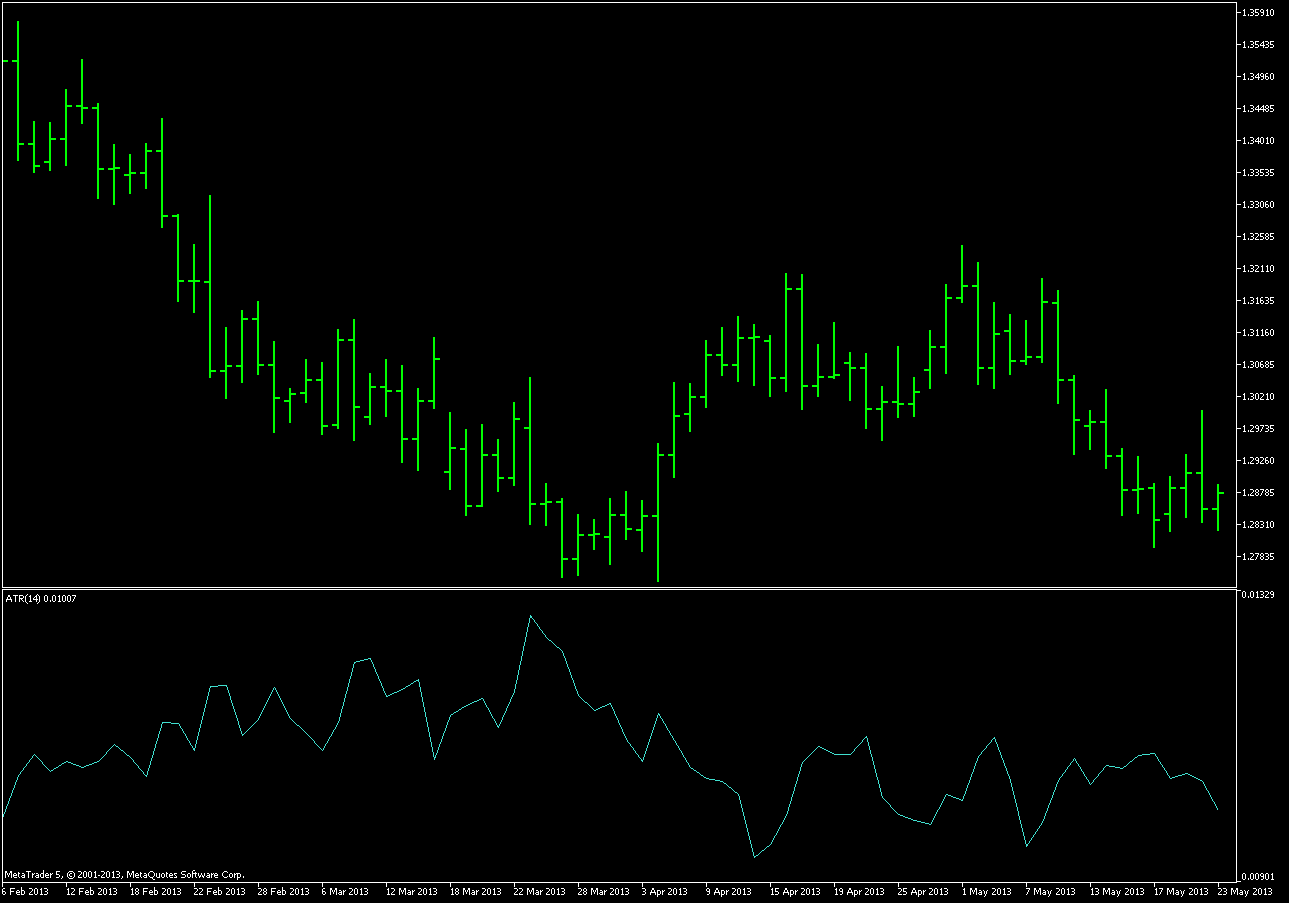

The average true range (ATR) is a technical analysis indicator that measures market volatility by decomposing the entire range of an asset price for that period. Specifically, ATR is a measure of volatility introduced by market technician J. Welles Wilder Jr. in his book, “New Concepts in Technical Trading Systems.” The true range indicator is taken as the greatest of the following: current high less the current low; the absolute value of the current high less the previous close; and the absolute value of the current low less the previous close. The average true range is then a moving average, generally using 14 days, of the true ranges.

**T3 Moving Average (T3)**
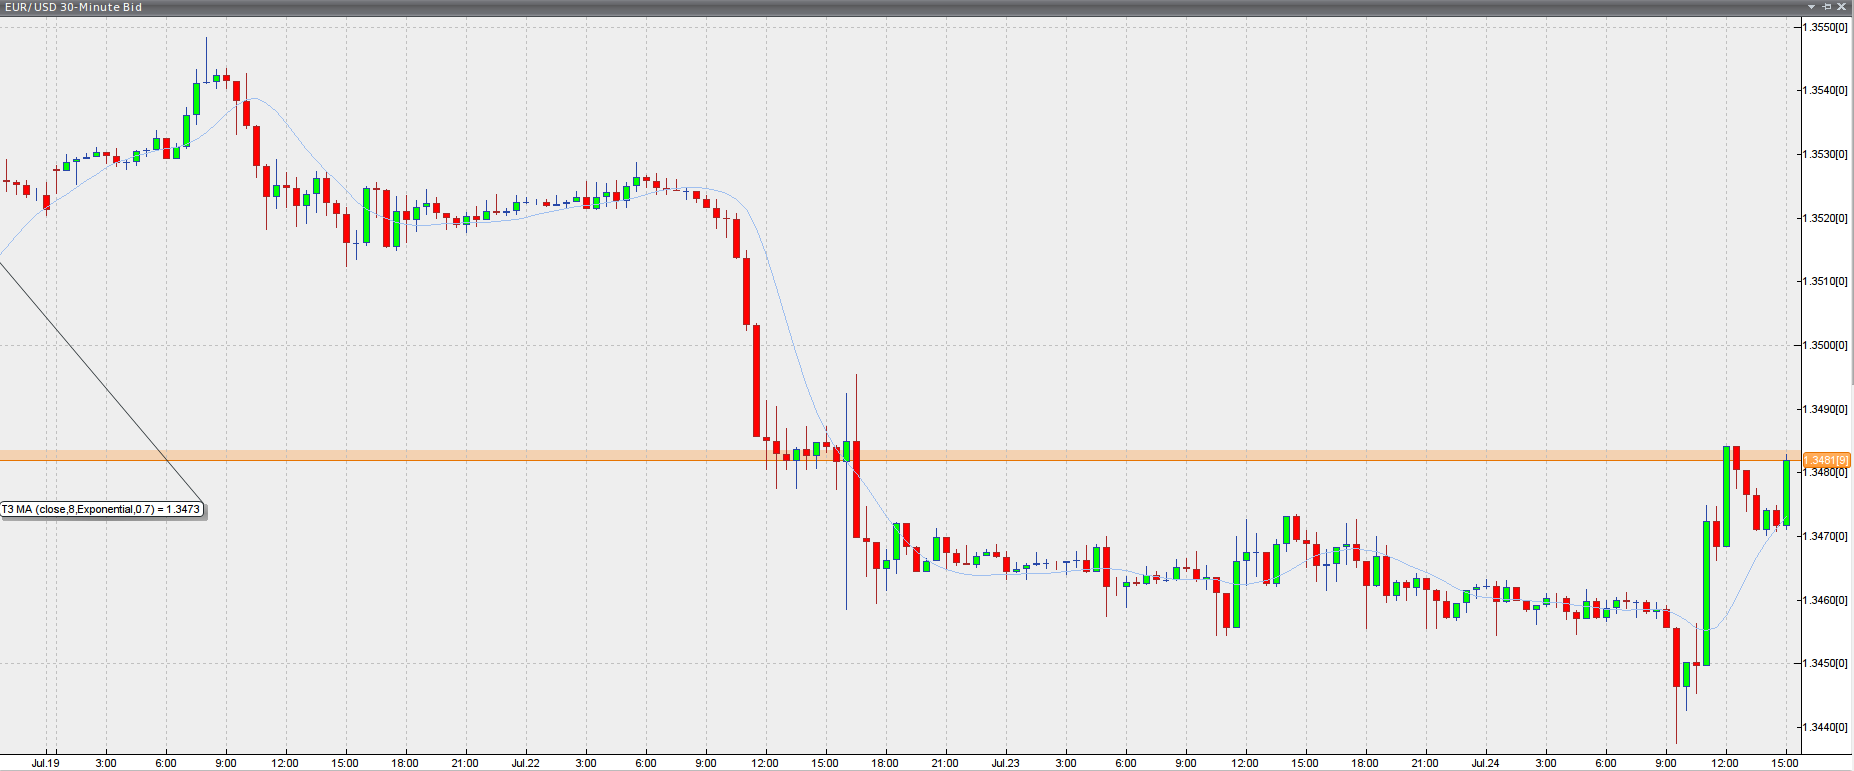

The T3 Moving Average is considered superior to traditional MAs as it is smoother, more responsive and thus performs better in ranging market conditions as well. The T3 Moving Average is calculated like other MAs, however, the T3 MA also uses a smoothing factor based on the difference between the current price and the previous T3 value. The T3 Moving Average generally produces entry signals similar to other MAs however, due to its smoothing factor the T3 tends to produce more reliable signals during choppy, sideways trading periods.

**Money Flow Index (MFI)**

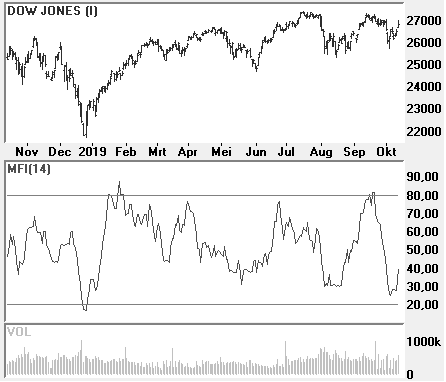

The Money Flow Index (MFI) is a technical oscillator that uses price and volume for identifying overbought or oversold conditions in an asset. It can also be used to spot divergences which warn of a trend change in price. The oscillator moves between 0 and 100. It is considered overbought if it goes above 80 and oversold if it goes below 20. Divergences between price and MFI may also indicate a price reversal.



**On-balance volume (OBV)**

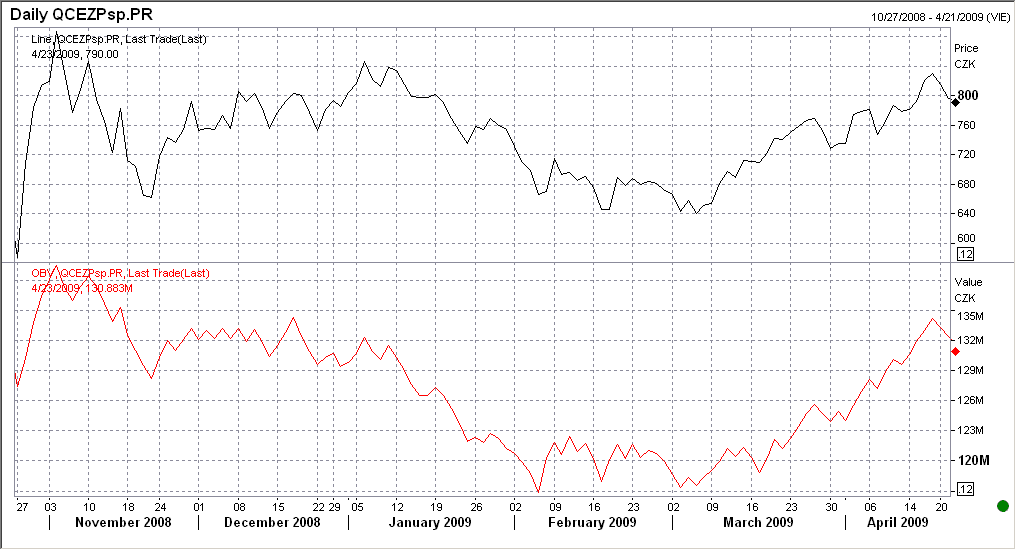

On-balance volume (OBV) is a technical trading momentum indicator that uses volume flow to predict changes in stock price. Joseph Granville first developed the OBV metric in the 1960s. He believed that, when volume increases sharply without a significant change in the stock’s price, the price will eventually jump upward, and vice versa. OBV is calculated by adding the total daily volume to a cumulative total when the price closes up, and subtracting the total daily volume when the price closes down.



**LogReturn indicator**

LogReturn indicator is a technical indicator that measures the logarithmic return of a security. It is calculated by taking the natural logarithm of the current price divided by the previous price. The log return indicator is used to measure the performance of a security over a certain period of time. It is often used to compare the performance of different securities over the same period of time.



**Rolling Z Score indicator**

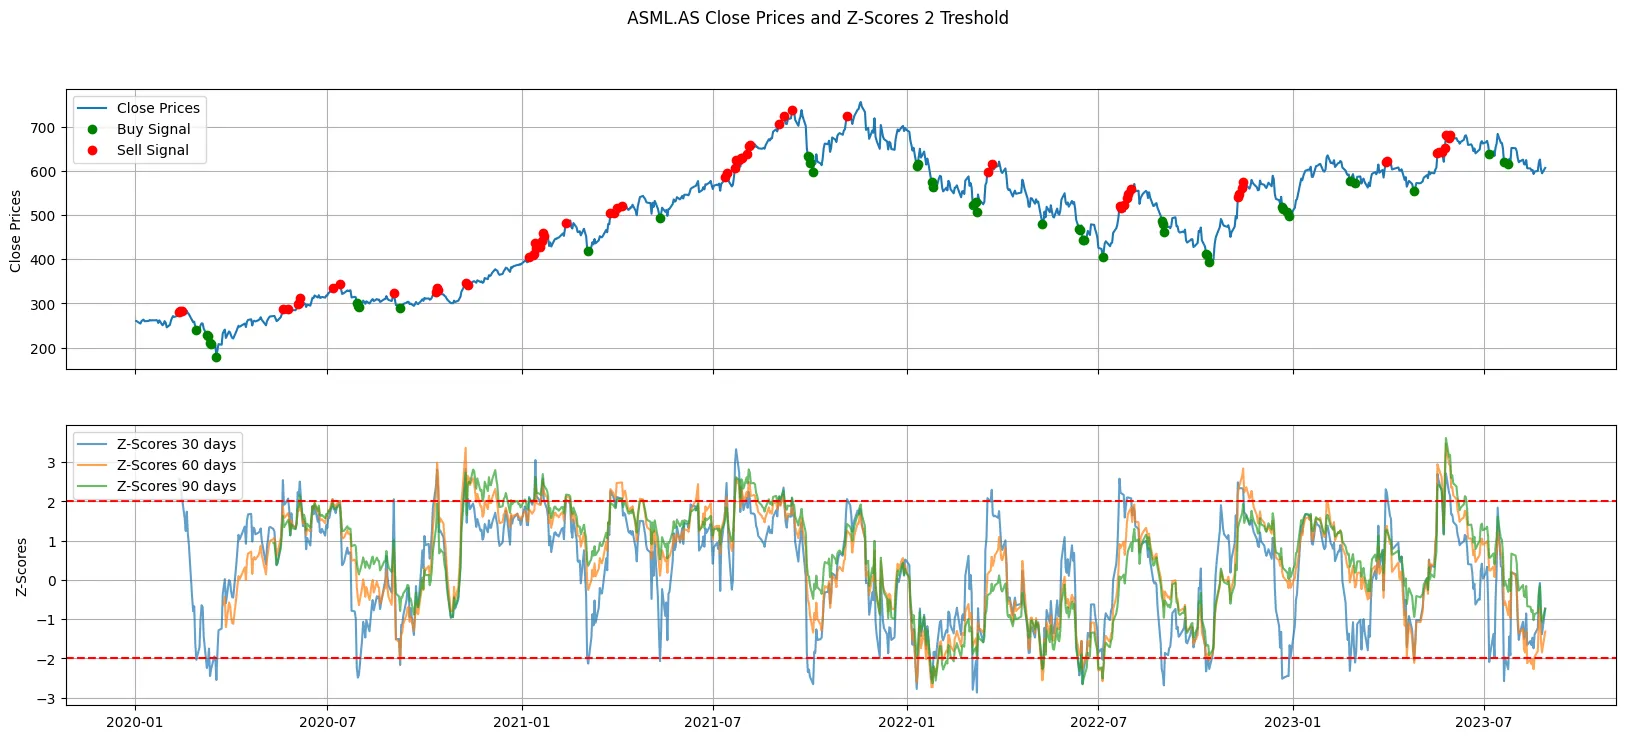

Rolling Z Score indicator is a technical indicator that measures the rolling z score of a security. It is calculated by taking the z score of the current price divided by the previous price. The rolling z score indicator is used to measure the performance of a security over a certain period of time. It is often used to compare the performance of different securities over the same period of time.



## Fetch the historical hourly stock price data


First, we will fetch the historical stock price data from Yahoo Finance. You could use the following command to fetch the historical stock price data:

In [ ]:
days = '2y'
hrsPerDay = 7

aapl = yf.Ticker('AAPL').history(interval='1h', period=f'{days}')
aapl

##Visualize the stock price

After fetching the stock price data, we could visualize the stock price data with matplotlib. You could use the following command to plot the historical Open and Close price of each day:

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18,6))
plt.plot(aapl.index, aapl['Open'], label="Open")
plt.plot(aapl.index, aapl['Close'], label="Close")
plt.legend()
plt.show()

You may also plot them individually:

In [ ]:
plt.figure(figsize=(18,6))
plt.plot(aapl.index, aapl['Open'], label="Open")
plt.legend()
plt.show()

plt.figure(figsize=(18,6))
plt.plot(aapl.index, aapl['Close'], label="Close", color='orange')
plt.legend()
plt.show()

##Data cleaning and Feature engineering

Let’s take a look to the basic statistical information of the stock price data. You could use the following command to print the statistical information of the stock price data:

In [ ]:
aapl.describe()

Since `Dividends` and `Stock Splits` are not carrying much information, we could drop them from the stock price data. You could use the following command to drop the `Dividends` and `Stock Splits` from the stock price data:

In [ ]:
aapl.drop(columns=['Dividends', 'Stock Splits'], inplace=True)

As you may notice, the stock price data only contains the Open, High, Low, Close and Volume. There are too few features for the RNN model to predict the stock price. It’s better to construct some technical indicators to help the RNN model to predict the stock price.

To calculate the technical indicators, we will use the `pandas_ta` package to construct the technical indicators. You could install the package with the following command:

In [ ]:
!pip install pandas_ta

After you install the package, first import it as `ta` and then crreate and run our own Custom Strategy on the dataframe with `ta.Strategy`:

In [ ]:
import pandas as pd
import pandas_ta as ta

# Create and run our own Custom Strategy on the dataframe
aapl.ta.strategy(ta.Strategy(
    name="My Custom Strategy",
    ta=[
        {"kind": "macd"}, # moving average convergence divergence
        {"kind": "bbands"}, # bollinger bands
        {"kind": "adx"}, # average directional index
        {"kind": "atr"}, # average true range
        {"kind": "t3"}, # t3 moving average
        {"kind": "mfi"}, # money flow index
        {"kind": "obv"}, # on-balance volume
        {"kind": "log_return"}, # log return
        {"kind": "zscore"}, # rolling z score
        {"kind": "qstick", "length":7}, # qstick
        {"kind": "short_run"} # short run
    ]
))

pd.options.display.max_columns = aapl.shape[1]
aapl.describe(include='all')

After the feature engineering, you could use the following command to see correlation between the features:



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(aapl.corr(), cmap=plt.cm.Reds)
plt.show()

##Data preprocessing

Before we train the RNN model, we need to preprocess the data. There are several steps to preprocess the data:



###Target variable
Before we train the RNN model, we need to preprocess the data. We will use the MinMaxScaler to scale the data to the range of 0 to 1. We also construct the target variable by shifting the Close price by the number of hours per day. You could use the following command to preprocess the data:

In [ ]:
target_offset = -hrsPerDay
aapl['Target'] = aapl['Close'].shift(target_offset)
aapl = (aapl - aapl.min()) / (aapl.max() - aapl.min())
aapl.dropna(inplace=True)

###Train and test split
There are 730 days data in total. We could split 20 percent of the data as the test data and use the remaining data as the training data. You could use the following command to split the data:

In [ ]:
testDays = int(730*0.2*hrsPerDay)
train_df = aapl.iloc[:-testDays]
test_df = aapl.iloc[-testDays:]

###Build the Pytorch DataLoader
After preprocessing the data, we could build the Pytorch DataLoader. You could use the following command to build the Pytorch DataLoader:

In [ ]:
import numpy as np
import torch
from torch import Tensor
from torch.utils.data import Dataset, DataLoader, TensorDataset

sequence_size = hrsPerDay * 5 # 5 days
batch_size = 256
features_size = len(train_df.drop(['Target'], axis=1).columns)

class SequenceDataset(Dataset):

    def __init__(self, df=pd.DataFrame(), label='', sequence_size=30):
        self.df = df
        self.label = label
        self.sequence_size = sequence_size

    def __len__(self):
        return len(self.df) - self.sequence_size

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        seq = Tensor(np.array(self.df.drop(self.label, axis=1).iloc[idx:idx+self.sequence_size, :], dtype=float))
        label = Tensor(np.array(self.df[[self.label]].iloc[idx+self.sequence_size, :], dtype=float))

        return (seq, label)

train_loader = DataLoader(SequenceDataset(train_df, label='Target', sequence_size=sequence_size), batch_size=batch_size, shuffle=True)
test_loader = DataLoader(SequenceDataset(test_df, label='Target', sequence_size=sequence_size), batch_size=batch_size, shuffle=False)

##Build the RNN model
After preprocessing the data, we could build the RNN model. The model architecture is very simple. It contains two GRU layers and two fully connected layers. Here is an overview of the model architecture:

```
graph LR
    A[Input] --> B[GRU]
    B --> C[GRU]
    C --> D[Linear]
    D --> E[Linear]
    
```

You could use the following command to build the model:

In [ ]:
import torch.nn as nn

hiddenSize = 256

class extract_tensor(nn.Module):
    def forward(self,x):
        # Output shape (batch, features, hidden)
        tensor, _ = x
        # Reshape shape (batch, hidden)
        return tensor[:, -1, :]

model = nn.Sequential(
    nn.GRU(features_size, hiddenSize, num_layers=2, batch_first=True, dropout=0.1),
    nn.Sequential(
      extract_tensor(),
      nn.Linear(hiddenSize, int(hiddenSize/2)),
      nn.Linear(int(hiddenSize/2), 1),
    )
)

###Define the loss function and optimizer

After building the model, we need to define the loss function and optimizer.You could use the following command to define the loss function and optimizer:

In [ ]:
from torch import optim

loss_function = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

###Train the model

After defining the loss function and optimizer, we could train the model. You could use the following command to train the model:

In [ ]:
%%time

from tqdm import tqdm
import torch

NUM_EPOCHS = 100
dev = 'cuda'
# comment previous line and uncomment following line if you don't have a GPU
# dev = 'cpu'

model.train() # put model in training mode

for epoch in range(NUM_EPOCHS):

  loop = tqdm(train_loader, position=0, leave=True)

  running_loss = 0.0

  for (batch, labels) in loop:

    optimizer.zero_grad()
    model.to(dev)
    output = model.forward(batch.to(dev))

    loss = loss_function(output, labels.to(dev))
    loss.to(dev)
    loss.backward()

    optimizer.step()

    running_loss += loss.item()
    loop.set_postfix(epoch=epoch, loss=running_loss)

###Visualize the result
After training the model, we could visualize the result. You could use the following command to visualize the result

In [ ]:
import matplotlib.pyplot as plt

correct = 0
loop = tqdm(test_loader, position=0, leave=True)
model.eval()

for (batch, labels) in loop:
    output = model.forward(batch.to(dev))
#     print(labels, output)
    plt.plot(range(0, len(output.cpu().detach())), labels.cpu().detach(), label="Target")
    plt.plot(range(0, len(output.cpu().detach())), output.cpu().detach(), label="Output")
    plt.legend()
    plt.show()

##Discussion
You may notice that the prediction line follows the target line closely with an offset. It seems that the RNN model is able to predict the stock price accurately. However, it’s not always the case. The stock price is very volatile. It’s very difficult to predict the stock price accurately.

In conclusion, even the model could predict the stock price closely, we could only take the result as a reference. It’s not practical to apply this kind of model for algo trading.

# **Case Study: Microsoft (MSFT)**

Let’s take a look at the stock price of Microsoft (MSFT). To make the model more practical, we could take another approach to make the model. We could predict the stock closing price change percentage instead of the stock price. So that it would be more practical to apply the model for algo trading.

##Fetch the historical stock price data

First, we will fetch the historical stock price data from Yahoo Finance. You could use the following command to fetch the historical stock price data:

In [ ]:
days = '2y'
hrsPerDay = 7

msft = yf.Ticker('MSFT').history(interval='1h', period=f'{days}')
msft.drop(columns=['Dividends', 'Stock Splits'], inplace=True)
msft

##Visualize the stock price
After fetching the stock price data, we could visualize the stock price data with matplotlib. You could use the following command to plot the historical Open and Close price of each day:

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18,6))
plt.plot(msft.index, msft['Close'], label="Close")
plt.legend()
plt.show()

##Construct the technical indicator features
After fetching the stock price data, we could construct the technical indicator features. You could use the following command to construct the technical indicator features:

In [ ]:
import pandas as pd
import pandas_ta as ta

# Create and run our own Custom Strategy on the dataframe
msft.ta.strategy(ta.Strategy(
    name="My Custom Strategy",
    ta=[
        {"kind": "macd"}, # moving average convergence divergence
        {"kind": "bbands"}, # bollinger bands
        {"kind": "adx"}, # average directional index
        {"kind": "atr"}, # average true range
        {"kind": "t3"}, # t3 moving average
        {"kind": "mfi"}, # money flow index
        {"kind": "obv"}, # on-balance volume
        {"kind": "log_return"}, # log return
        {"kind": "zscore"}, # rolling z score
        {"kind": "qstick", "length":7}, # qstick
        {"kind": "short_run"} # short run
    ]
))

pd.options.display.max_columns = msft.shape[1]
msft.describe(include='all')

##Construct the target variable and apply Z-score normalization
Before we train the RNN model, we need to construct the target variable. We caculate the stock closing price change percentage by shifting the Close price by the number of hours per day, subtracting the Close price and then dividing by the Close price.

###Standard score (Z-score) normalization
Standard score (Z-score) normalization is the process of standardizing the features of a dataset. It is a common technique used in machine learning to transform features to have a mean of 0 and a standard deviation of 1. It is useful when the features of a dataset have different units of measurement.

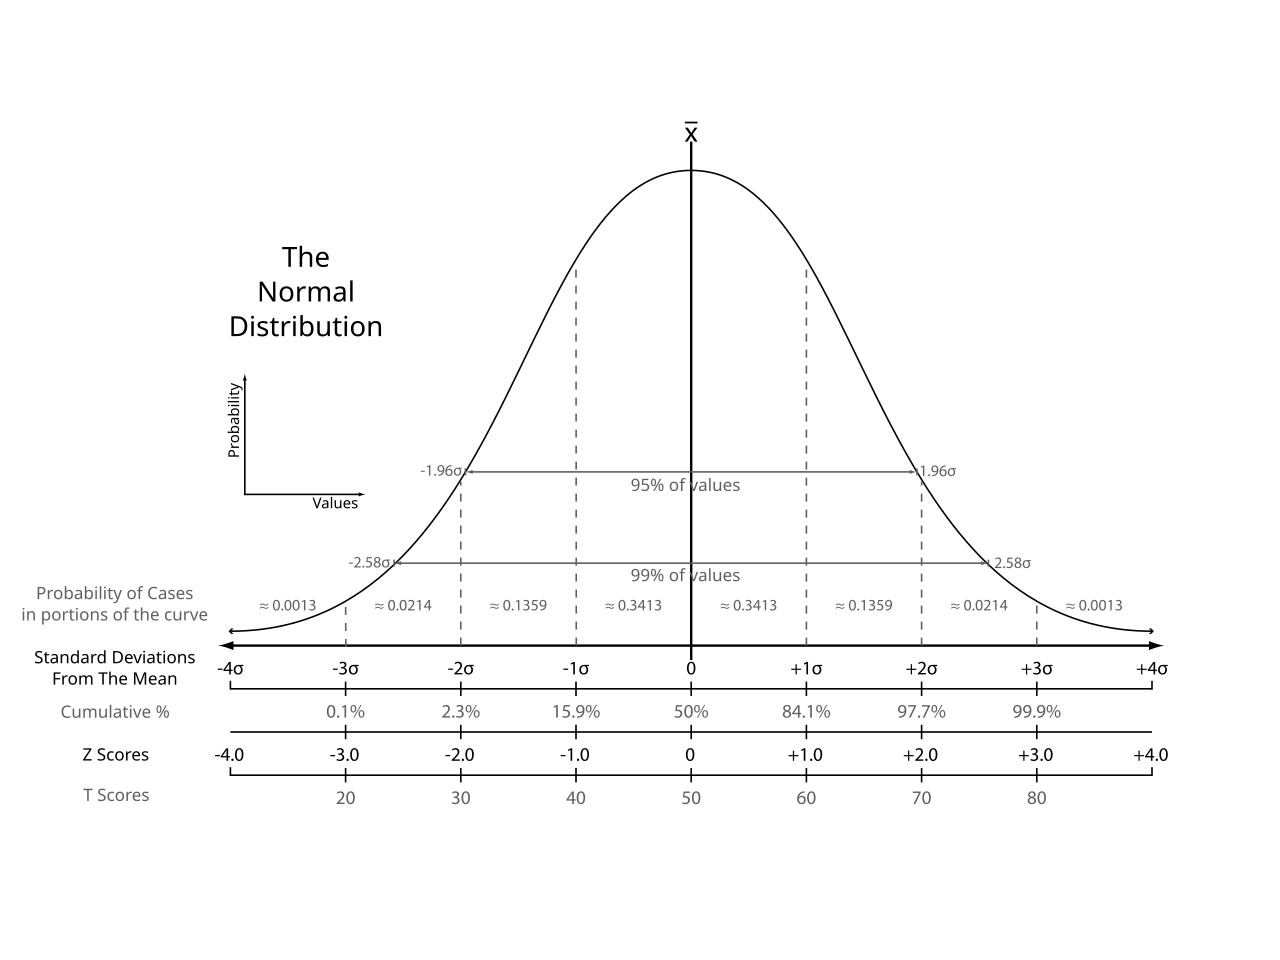

We then apply Z-score normalization to the stock price data. You could use the following command to construct the target variable and apply Z-score normalization:

In [ ]:
target_offset = -hrsPerDay
target = ((msft['Close'].shift(target_offset) - msft['Close']) / msft['Close'] * 100)
msft = (msft - msft.mean())/msft.std(ddof=0) # Z-score calculation
msft['Target'] = target
msft.dropna(inplace=True)

##Train and test split
There are 730 days data in total. We could split 20 percent of the data as the test data and use the remaining data as the training data. You could use the following command to split the data:

In [ ]:
testDays = int(730*0.2*hrsPerDay)
train_df = msft.iloc[:-testDays]
test_df = msft.iloc[-testDays:]

Let’s take a look at the `Target` of training data:

In [ ]:
plt.figure(figsize=(18,6))
train_df['Target'].plot()

##Build the Pytorch DataLoader
After preprocessing the data, we could build the Pytorch DataLoader. We will use the previous declared SequenceDataset class to build the Pytorch DataLoader. You could use the following command to build the Pytorch DataLoader:

In [ ]:
import numpy as np
import torch
from torch import nn, Tensor
from torch.utils.data import Dataset, TensorDataset, DataLoader

sequence_size = hrsPerDay * 5 # 5 days
batch_size = 256
features_size = len(train_df.drop(['Target'], axis=1).columns)

class SequenceDataset(Dataset):

    def __init__(self, df=pd.DataFrame(), label='', sequence_size=30):
        self.df = df
        self.label = label
        self.sequence_size = sequence_size

    def __len__(self):
        return len(self.df) - self.sequence_size

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        seq = Tensor(np.array(self.df.drop(self.label, axis=1).iloc[idx:idx+self.sequence_size, :], dtype=float))
        label = Tensor(np.array(self.df[[self.label]].iloc[idx+self.sequence_size, :], dtype=float))

        return (seq, label)

train_loader = DataLoader(SequenceDataset(train_df, label='Target', sequence_size=sequence_size), batch_size=batch_size, shuffle=True)
test_loader = DataLoader(SequenceDataset(test_df, label='Target', sequence_size=sequence_size), batch_size=batch_size, shuffle=False)

##Build the RNN model
After preprocessing the data, we could build the RNN model. We also re-use previous model architecture. You could use the following command to build the model:

In [ ]:
hiddenSize = 256

model = nn.Sequential(
    nn.GRU(features_size, hiddenSize, num_layers=2, batch_first=True, dropout=0.1),
    nn.Sequential(
      extract_tensor(),
      nn.Linear(hiddenSize, int(hiddenSize/2)),
      nn.Linear(int(hiddenSize/2), 1),
    )
)

##Define the loss function and optimizer
After building the model, we need to define the loss function and optimizer.

###GaussianNLLLoss
In this model, we will use the GaussianNLLLoss as the loss function. The GaussianNLLLoss is a loss function that measures the negative log likelihood of the Gaussian distribution.


###RMSprop optimizer
RMSprop is an optimizer that uses the magnitude of recent gradients to normalize the gradients. It is a popular optimizer for training RNN models.


You could use the following command to define the loss function and optimizer:

In [ ]:
from torch import optim

loss_function = nn.GaussianNLLLoss()
optimizer = optim.RMSprop(model.parameters(), lr=1e-3)

##Train the model
After defining the loss function and optimizer, we could train the model. You could use the following command to train the model:

In [ ]:
%%time

from tqdm import tqdm
import torch

NUM_EPOCHS = 500
dev = 'cuda'
# comment previous line and uncomment following line if you don't have a GPU
# dev = 'cpu'

model.train() # put model in training mode

for epoch in range(NUM_EPOCHS):

  loop = tqdm(train_loader, position=0, leave=True)

  running_loss = 0.0

  for (batch, labels) in loop:

    optimizer.zero_grad()
    model.to(dev)
    output = model.forward(batch.to(dev))

    loss = loss_function(output, labels.to(dev), torch.ones(output.shape).to(dev))
    loss.to(dev)
    loss.backward()

    optimizer.step()

    running_loss += loss.item()
    loop.set_postfix(epoch=epoch, loss=running_loss)

In [ ]:
import matplotlib.pyplot as plt

correct = 0
loop = tqdm(test_loader, position=0, leave=True)
model.eval()

for (batch, labels) in loop:
    output = model.forward(batch.to(dev))
    #print(labels, output)
    plt.plot(range(0, len(output.cpu().detach())), labels.cpu().detach(), label="Target")
    plt.plot(range(0, len(output.cpu().detach())), output.cpu().detach(), label="Output")
    plt.legend()
    plt.show()

# **Exploratory Exercise: Nvidia (NVDA)**

Please apply what you have learn from the lab to predict the stock price of Nvidia (NVDA) and show me your result. You may also try to use different technical indicators and increase the number of epochs to see if it could improve the model performance.

### Instructions

* Fetch the historical stock price data of Nvidia and visulize the data
* Split the data into train and test set
* Build dataloaders and model
* Train and evaluate the model